<a href="https://colab.research.google.com/github/GitGud069/I-N303G_Skilaverkefni/blob/main/I%C3%90N303G_Re_Hv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IÐN303G Re - Heimaverkefni 1.

Halldór Óli Gunnarsson

-hog42@hi.is

-2805012040

Líkun

Hér er:
$q_{in}(t)$ = Inflæði ($m^3/s$)

$A$ = Yfirborð ($m^2$)

$h(t)$ = Vatnshæð ($m$)

$\rho$ = Eðlisþyngd ($kg/m^3$)

$g$ = þyngdarafl ($m/s^2$)

$R$ = Viðnám ($kg/(sm^4$))

Rúmmál tanks

$$\frac{dV(t)}{dt} = A \times \frac{dh(t)}{dt} = q_{inn}(t)-q_{út}(t)$$
Einangra $q_{út}$ og $q_{inn}$
$$q_{út}(t) = \Delta h \times \frac{\rho \times g}{R}$$

$$q_{inn}(t) = \Delta h \times \frac{\rho \times g}{R} +A \times \frac{dh(t)}{dt}$$

$$\frac{d\Delta h(t)}{dt}+\frac{\rho g}{AR}\Delta h(t)= \frac{\Delta q_{in}(t)}{A}$$


Ef $\frac{dh}{dt} = 0$



Hér er nálgun með Euler
$$\Delta h(t) = \Delta h(t-1)+\frac{q_{in}(t-1)*dt}{3}-\frac{\rho*g*\Delta h(t-1)*dt}{A*R}$$

Hermun


Í hermun er notað formúlu til að reikna afleiðu af h(t).
$$h'(t) = \lim_{\Delta t \xrightarrow{} 0} = \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

Svo er x = t + $\Delta t$.

$$f(t+\Delta t) = f(t) + \Delta tf'(t)$$

Upphafstími $t_0$ og $f(t_0)$ fengið með reikningum fyrr i, $(t_i)$. i $\epsilon$ 1,2,...,n $$f(t_i) = f(t_{i-1}) + \Delta t f´(t_{i-1})$$ þar sem $t_i = t_{t-1}+\Delta t.$

Diffurjafna okkar gildir er $$\Delta q_{inn} = A \times \frac{dh}{dt} + \frac{dh}{dt} \times \frac{\rho \times g}{R}$$



1. Leiðið út líkan sem lýsir sambandi innflæðis og vatnshæðar fyrir breytingar í kringum jafnvægispunkt. Gerið ráð fyrir að flatarmál botnflatar sé A og að við botn tanksins sé úttak í formi loka sem hefur viðnámið R.

Líkan



2. Skrifið fall í Python sem tekur við upplýsingum um flatarmál botnflatar, viðnám loka, söfnunartíma hermunar og innflæði (frávik frá jafnvægispunkti) og skilar vatnshæð (frávik frá jafnvægispunkti) með aðstoð hermunar. Innflæði og vatnshæð skulu vera jafnlangir vigrar.

In [2]:
#frekar gott

import numpy as np
import matplotlib.pyplot as plt

def delta_h_simulering(A, R, dt, inflow_deviation):

    rho = 1000
    g = 9.81
    q1 = 0
    time_total = 600  # s, heildartími hermunar
    time_range = list(range(0, time_total + 1))
    delta_h = np.zeros(time_total)
    start = 100 # sek


    for t in range(start, time_total):
        #delta_h[t] = delta_h[t-1] + (inflow_deviation[t-1] * dt)/A - (rho* g *delta_h[t-1] * dt) / (A * R) #h+q_in-q_út
        delta_h[t] =(inflow_deviation[t-1] * dt) / A - (rho * g * delta_h[t-1] * dt) / (A * R)

    return delta_h

3. Skrifið kóða sem notar fallið úr 2. til að herma breytingar í vatnshæð í 600s með söfnunartíma 0.1s í tanki þar sem A = 0.0m^2 og R= 1*10^7 þegar:

A. Innflæði hækkar um 5*10^-9 í t_0.

B. Innflæði breytist eins og sinusbylgja með útslag 5*10^-9 og sveiflutíma 120s.

Hér í A er sýnt hækkun innflæðis um 5*10^-9 í t_0 = 100 sek. Ég varli 100 sem random tölu.

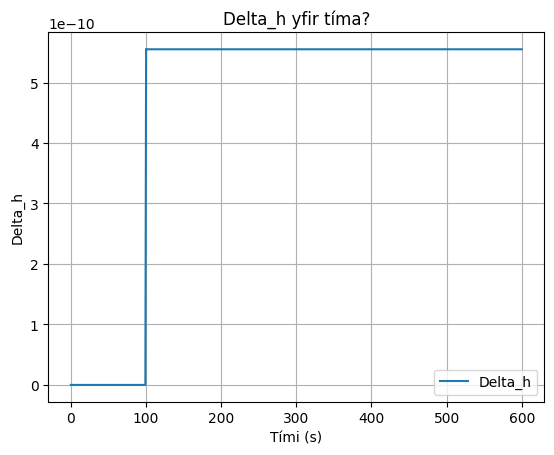

In [3]:
# Parametrar
# a

A = 0.09  # m^2
R = 10**7  # kg/(s*m^4)
time_total = 600

dt = 0.1  # söfnunartími hermunar
inflow_deviation = np.ones(time_total) * 5e-10  # m^3/s, frávik frá jafnvægisinnflæði

The_delta_h = delta_h_simulering(A, R, dt, inflow_deviation)

time_points = np.linspace(0, time_total, len(The_delta_h))

plt.plot(time_points, The_delta_h, label="Delta_h")
plt.xlabel("Tími (s)")
plt.ylabel("Delta_h")
plt.title("Delta_h yfir tíma?")
plt.legend()
plt.grid(True)
plt.show()

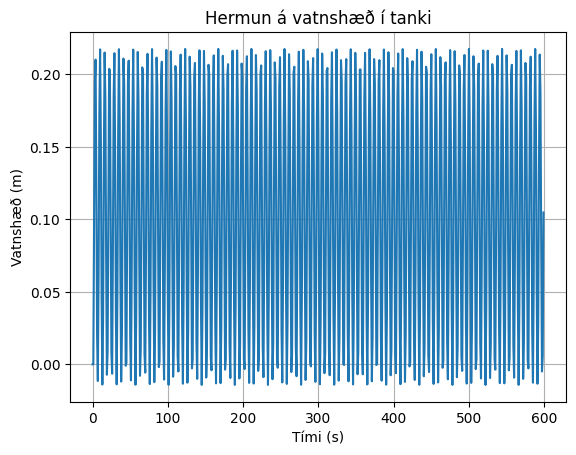

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_tank(A, R, dt, Q_in, initial_h=0):
    #n = len(Q_in)
    n = time_total
    # Vektor fyrir vatnshæð (frávik frá jafnvægispunkti)
    h = np.zeros(time_total)
    h[0] = initial_h  # Upphafshæð

    # Hermun með Euler aðferðinni
    for i in range(1, time_total):
        q_out = h[i-1]/R
        dh_dt = (Q_in[i-1] - q_out) / A
        h[i] = h[i-1] + dh_dt * dt

    return h

# Dæmi um notkun:
A = 0.9      # Flatarmál botnflatar (t.d. 1 m²)
R = 10**7      # Viðnám loka (t.d. 2 s/m)
dt = 0.1     # Tímaskref (t.d. 0.1 s)
timalengd = 600
t = np.arange(0, timalengd, 10*dt)  # Tímarúm (0 til 10 sekúndur)
Q_in = np.sin(t)  # Dæmi um innflæði sem sinusfall

h = simulate_tank(A, R, dt, Q_in)

# Teikna niðurstöður
plt.plot(t, h)
plt.xlabel('Tími (s)')
plt.ylabel('Vatnshæð (m)')
plt.title('Hermun á vatnshæð í tanki')
plt.grid(True)
plt.show()

4. Skrifið kóða sem sýnir niðurstöður hermunarinnar myndrænt. Teiknið innflæði og vatnshæð á sama grafi fyrir bæði a og b.

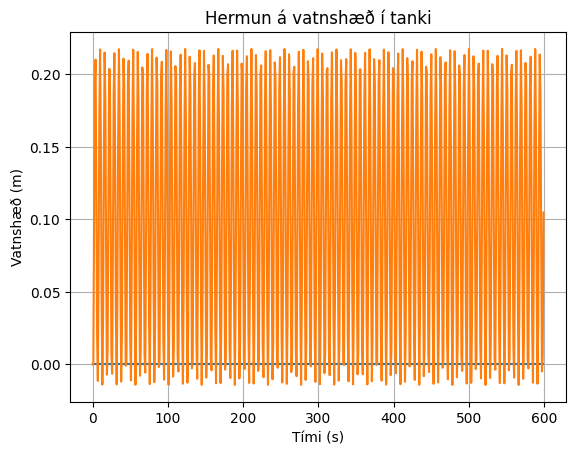

In [19]:
plt.plot(time_points, The_delta_h, label="Delta_h")
plt.xlabel("Tími (s)")
plt.ylabel("Delta_h")
plt.title("Delta_h yfir tíma?")


plt.plot(t, h)
plt.xlabel('Tími (s)')
plt.ylabel('Vatnshæð (m)')
plt.title('Hermun á vatnshæð í tanki')
plt.grid(True)
plt.show()

Niðurstöður


Hermun sýnir að það þarf að nota afleiðu til að reikna $\frac{\Delta h(t)}{dt}$ út frá rúmmál tanks. Samhvæmt niðurstöðunum hækkar jafnvægishæð vatnsins þegar innflæðið er hækkað, en þegar innflæðið breytist eins og sinus bylgja breytist útflæði eins og sínus bylgja nokkrum sekundum eftir.


Lokaorð

Þetta var smá skrítið verkefni þegar það kemur að python, að mínu mati náði ég ekki að skrifa góðan kóða. Kóði 3b virkar ekki alminnilega og er eiginlega ólesanlegur, t.d í 4. Þar sem hinn línan sérst bara ef maður horfir á sekundu 100. Allt í allt máti þetta fara betur.